# Use Case: Handwritten Digit Recognition MNIST using the Keras library




In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow.keras as keras

In [ ]:
import keras

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### Image Representation

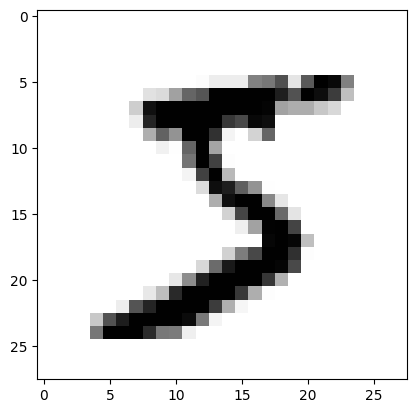

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

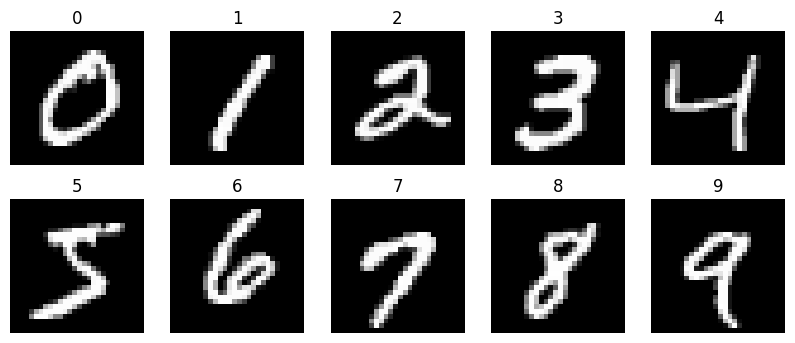

In [ ]:
plt.figure(figsize=(10,4))

lista=list(y_train)
for i in range(10):
    plt.subplot(2,5,i+1)
    idx = lista.index(i) #The index() method returns the index of the given element in the list
    plt.imshow(x_train[idx], 'gray')
    plt.title(y_train[idx])
    plt.axis('off')

plt.show()

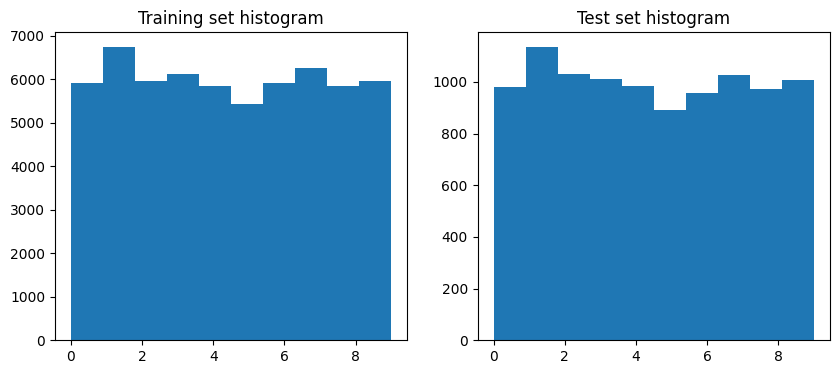

In [ ]:
# Verificamos que el conjunto de entrenamiento y test siguen la misma distribución de clases
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(y_train[:], bins=10)
plt. title('Training set histogram')
plt.subplot(122)
plt.hist(y_test[:], bins=10)
plt. title('Test set histogram')
plt.show()

### Tensor in Keras:
* Number of axes (also known as rank or dimensions)
* Shape
* Data type

In [ ]:
print("Number of axes of the tensor: ", x_train.ndim)
print("Dimension of the training tensor: ", x_train.shape)
print("Dimension of the test tensor: ", x_test.shape)
print("Data type contained in the tensor: ", x_train.dtype)

Number of axes of the tensor:  3
Dimension of the training tensor:  (60000, 28, 28)
Dimension of the test tensor:  (10000, 28, 28)
Data type contained in the tensor:  uint8


The MNIST images are 28x28 pixels represented as a matrix of numbers whose values range from [0,255] of type uint8. We are going to scale the input values to float32 values within the interval [0,1].

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

We modify the input to the network from a 2D tensor to a 1D tensor by flattening it.
This means concatenating the 28x28 = 784 numbers row by row.

In [ ]:
x_train=x_train.reshape(60000,784)
print("New dimension for the training set:", x_train.shape )
x_test=x_test.reshape(10000,784)
print("New dimension for the test set:", x_test.shape )

New dimension for the training set: (60000, 784)
New dimension for the test set: (10000, 784)


We will represent the label with a vector of 10 positions (10 digits), where the position corresponding to the digit that the image represents contains a 1, and the rest of the positions in the vector contain the value 0. This is known as one-hot encoding, and it is used for categorical variables.

In [ ]:
from keras.utils import to_categorical
y_train= to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

print("Dimension of labels in the training set:", y_train.shape)
print(y_train[0], "==>", list(y_train[0]).index(1))

Dimension of labels in the training set: (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] ==> 5


# Network Architecture

The main data structure in Keras is the Sequential class, which allows us to create neural networks. We will define the architecture of a network by adding successive layers using the add method.

Sequential models in Keras are conceived as a stack of layers, where each layer takes a tensor as input and produces another tensor as output. When creating the sequential model, you specify a list of the layers that will compose the model. The entire model acts as a TensorFlow function.

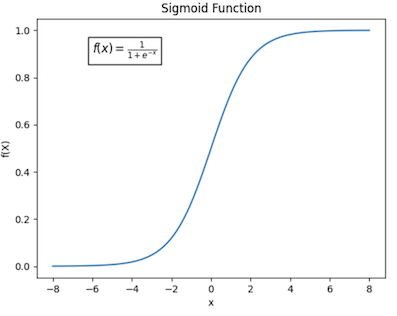


In the first layer, we use the sigmoid function. The primary reason for using it is its range, which exists between (0,1). Consequently, it is especially used for models where we need to predict a probability as an output.

In the output layer, the softmax activation function is applied in multi-class classification problems (it is not the most suitable for binary classification because it tends to exaggerate the differences between probabilities). Softmax "simulates" the probability of belonging to a class. For example, in a problem with 7 classes, if the input vector to the softmax function were [1, 2, 3, 4, 1, 2, 3], the function would return [0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175], and we would say that the data belongs to class 3 (counting from zero).

$$
 \arg\max_i \left( \frac{\exp(x_i)}{\sum_j \exp(x_j)} \right)
$$


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model=Sequential()
model.add(Dense(10,activation='sigmoid', input_shape=(784,))) # Hidden layer with 10 neurons
model.add(Dense(10,activation='softmax'))

print("Summary of the number of parameters in the MLP:")
model.summary()

Summary of the number of parameters in the MLP:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Number of parameters

To calculate the number of parameters in each layer of the **MLP (Multi-Layer Perceptron)**, you can use the following formulas:

**For a dense layer:**

The number of parameters for the weights matrix is (input_size * number_of_neurons).
The number of parameters for the bias vector is number_of_neurons.
Let's break down the calculation for each layer:

**First Dense Layer:**

Input size: 784 (specified in input_shape)

Number of neurons: 10

Parameters for weights: (784 * 10) = 7840

Parameters for biases: 10 (1 bias * 10 number of neurons)

Total parameters for this layer: 7840 + 10 = 7850

**Second Dense Layer:**

Input size: 10 (output of the first dense layer, as there are 10 neurons in the previous layer)

Number of neurons: 10

Parameters for weights: (10 * 10) = 100

Parameters for biases: 10 (as above 1 bias * 10 numer of neurons)

Total parameters for this layer: 100 + 10 = 110

Therefore, the total number of parameters in the MLP is the sum of the parameters in both layers:

Total params = 7850 (params in the first dense layer) + 110 (params in the second dense layer) = 7960.

### Learning Process

Once the model is defined, we need to configure how the learning process will be:

* Loss function ==> Function to minimize
* Optimization algorithm to use (in our case stochastic gradient descent)
* Metric to monitor the learning process

**As a loss function in a multiclass problem, we will use cross-entropy. With cross-entropy, the label must be in "one_hot encoding" representation.**

Optimizers are mathematical functions for modifying the network weights given the gradient and additional information. The additional information is what differentiates one optimizer from another. One of the most used optimizers is the Adam optimizer.

**Adam or SGD? Typically, Adam converges more quickly and SGD generalizes better.**



In [15]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

# Training the model

In [16]:

history = model.fit(x_train, y_train,validation_split=0.20, batch_size=100, epochs=100,verbose=1)


Epoch 1/100
480/480 [==============================] - 2s 4ms/step - loss: 2.2279 - accuracy: 0.2425 - val_loss: 2.1072 - val_accuracy: 0.4112
Epoch 2/100
480/480 [==============================] - 1s 3ms/step - loss: 2.0147 - accuracy: 0.4946 - val_loss: 1.9124 - val_accuracy: 0.5706
Epoch 3/100
480/480 [==============================] - 1s 3ms/step - loss: 1.8294 - accuracy: 0.5994 - val_loss: 1.7309 - val_accuracy: 0.6453
Epoch 4/100
480/480 [==============================] - 1s 3ms/step - loss: 1.6586 - accuracy: 0.6534 - val_loss: 1.5655 - val_accuracy: 0.6926
Epoch 5/100
480/480 [==============================] - 2s 5ms/step - loss: 1.5059 - accuracy: 0.6927 - val_loss: 1.4202 - val_accuracy: 0.7246
Epoch 6/100
480/480 [==============================] - 1s 3ms/step - loss: 1.3735 - accuracy: 0.7215 - val_loss: 1.2957 - val_accuracy: 0.7502
Epoch 7/100
480/480 [==============================] - 1s 3ms/step - loss: 1.2608 - accuracy: 0.7425 - val_loss: 1.1907 - val_accuracy: 0.7717

# Model evaluation

In [17]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Test accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.9131
Test accuracy:  0.913100004196167


Posible in history:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


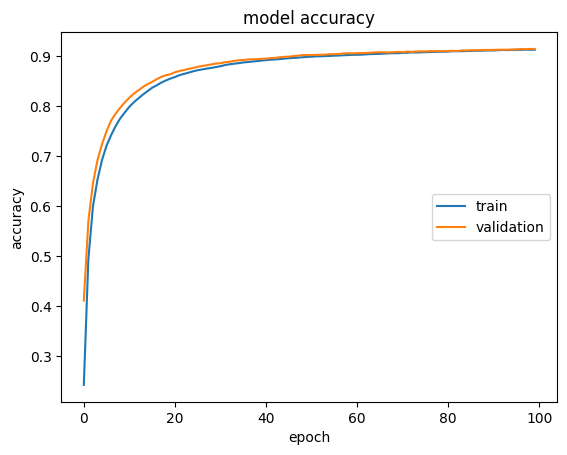

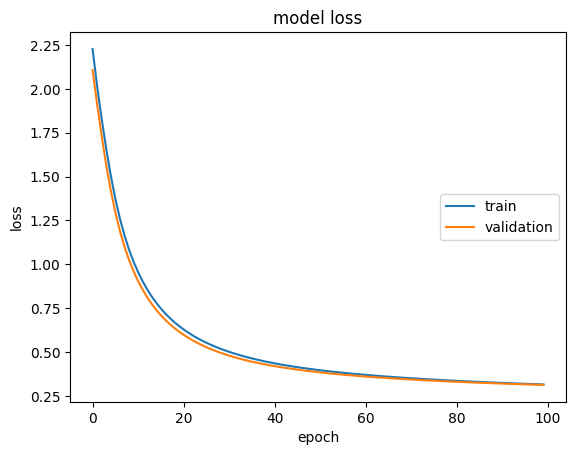

In [18]:
# list all data in history
print("Posible in history: ", history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center right')
plt.show()

# Generating predictions

In [19]:
import numpy as np

predictions=model.predict(x_test)

#Showing the prediction for a value
print("(Real, Predicted): (",np.argmax(y_test[23]), ",", np.argmax(predictions[23]), ")")
print("Output with softmax: ", predictions[23])

313/313 [==============================] - 1s 2ms/step
(Real, Predicted): ( 5 , 5 )
Output with softmax:  [7.0865704e-03 6.8295252e-04 4.0159526e-04 3.6390247e-03 1.0528461e-02
 9.6584702e-01 5.4273950e-03 5.0946186e-05 5.4371138e-03 8.9877011e-04]


In [20]:
y_test_true = np.argmax(y_test, axis=1)
y_test_predic = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix
print ("\nConfusion Matrix\n")
confusion=confusion_matrix(y_test_true, y_test_predic)
confusion


Confusion Matrix



array([[ 951,    0,    6,    3,    1,    5,    5,    2,    4,    3],
       [   0, 1107,    3,    2,    1,    1,    4,    2,   15,    0],
       [   8,    3,  918,   11,   13,    4,   17,   16,   38,    4],
       [   2,    1,   38,  886,    0,   44,    2,   19,   14,    4],
       [   2,    5,    5,    0,  926,    0,   13,    1,    3,   27],
       [  17,    2,    8,   44,    8,  745,   15,   10,   35,    8],
       [  15,    2,   10,    0,   13,   17,  893,    0,    8,    0],
       [   4,   12,   23,   10,    8,    0,    0,  943,    3,   25],
       [   8,    8,    9,   27,   11,   24,   17,   10,  852,    8],
       [   9,    4,    2,   13,   35,   10,    1,   20,    5,  910]])

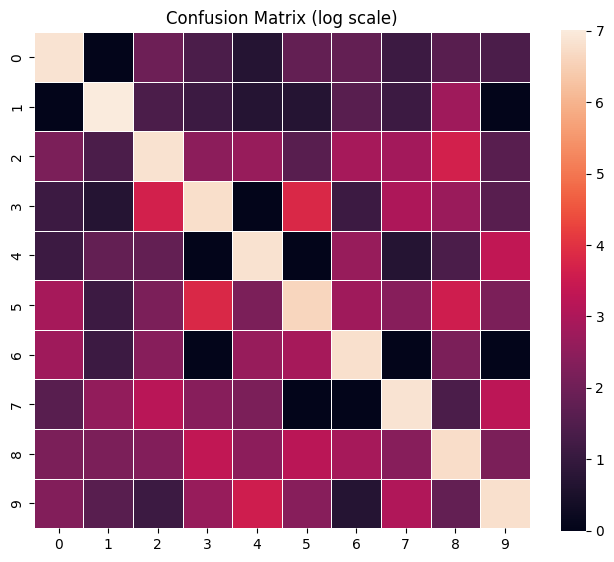

In [21]:

import seaborn as sns
# In logarithmic scale!
plt.figure(figsize=(8,6.5))
plt.title('Confusion Matrix (log scale)')
sns.heatmap(np.log(confusion+1),
            xticklabels=np.arange(10),
            yticklabels=np.arange(10),
            square=True,
            linewidth=0.5,)

plt.show()
